<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - KNN Item Item MAE</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

# Import libraries and define evaluation function

In [4]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, item_knn as knn
from lenskit.metrics.predict import mae
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import style

ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # train the algorithm with the training dataset
    # Now we run the recommender:
    preds = batch.predict(fittable, test)
    # add the algorithm name for analyzability
    return preds

# Run manual optimization

In [2]:
def model_trainer(neighbours):
    neighbours=int(neighbours)
    all_recs = []
    test_data = []
    algo_ii = knn.ItemItem(neighbours,aggregate='weighted-average') # define algorithm
    
    for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
        test_data.append(test) # save testing data
        all_recs.append(eval('ItemItem', algo_ii, train, test))
    
    all_recs = pd.concat(all_recs, ignore_index=True)

    results = mae(all_recs['prediction'], all_recs['rating'])
    return results

In [ ]:
neighbours = []
metric = [[] for _ in range(5)]

for i in range(1,21):
    neighbours.append(i*5)

for j in range(len(metric)):
    for i in neighbours:
        metric[j].append(model_trainer(i))

# Load previously ran output

In [6]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\KNN Item Item\\Manual optimization results\\mae_metric.csv', sep=',')
neighbours = pd.DataFrame(neighbours)
metric =  pd.concat([neighbours,metric],axis=1)
names = ["neighbours","1","2","3","4","5"]
metric.columns = names
metric

,neighbours,1,2,3,4,5
0,5,0.727390,0.724069,0.731668,0.723461,0.719574
1,10,0.713923,0.712868,0.711215,0.712481,0.713184
2,15,0.706717,0.710053,0.709842,0.699140,0.704874
3,20,0.705886,0.706860,0.704925,0.709068,0.706638
4,25,0.707547,0.700684,0.711166,0.711419,0.703869
5,30,0.710583,0.707350,0.706727,0.708631,0.705038
6,35,0.711836,0.709646,0.709348,0.711715,0.707307
7,40,0.702954,0.716424,0.707776,0.703515,0.704862
8,45,0.711499,0.712117,0.711209,0.711983,0.707369
9,50,0.710133,0.714222,0.709652,0.704316,0.706226


# Optimal number of neighbours

In [14]:
print("Lowest MAE:",min(metric[["1","2","3","4","5"]].mean(axis=1)))
idx = metric[["1","2","3","4","5"]].mean(axis=1).idxmin()
print("Optimal number of neighbours:", metric.iloc[idx]['neighbours'])
average = metric[["1","2","3","4","5"]].mean(axis=1)
average = pd.DataFrame(average)
average = pd.concat([neighbours,average],axis=1)
average.columns = ['Neighbours','Average MAE']
average

Lowest MAE: 0.7061252042089613
Optimal number of neighbours: 15.0


,Neighbours,Average MAE
0,5,0.725232
1,10,0.712734
2,15,0.706125
3,20,0.706675
4,25,0.706937
5,30,0.707666
6,35,0.709971
7,40,0.707106
8,45,0.710836
9,50,0.708910


# Average plot

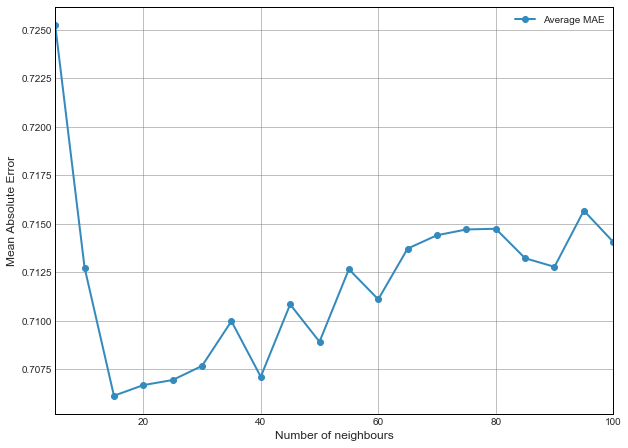

In [17]:
average.plot(x='Neighbours',y='Average MAE',grid=True, figsize=(10,7.5),marker='o')
style.use('seaborn-whitegrid')
plt.grid(color='gray')
plt.rc_context({'axes.edgecolor':'black'})
pl.xlabel("Number of neighbours")
pl.ylabel("Mean Absolute Error")
plt.legend(loc='upper right')

# MAE Plot

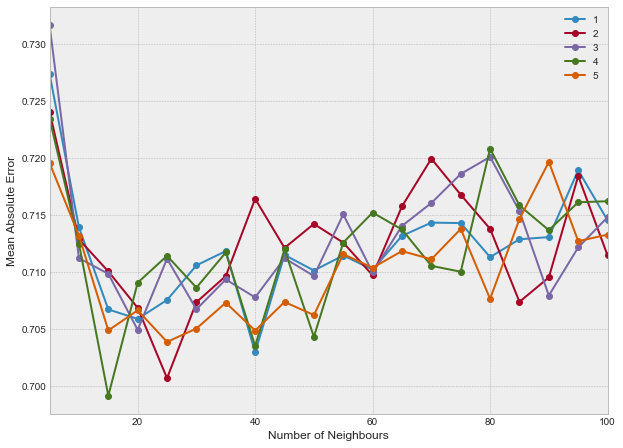

In [13]:
metric.plot(x="neighbours", y = ["1","2","3","4","5"], grid=True, figsize=(10,7.5),marker='o')
style.use('bmh')
pl.xlabel("Number of Neighbours")
pl.ylabel("Mean Absolute Error")
plt.legend(loc='upper right')